# Examples_of_Time_Series to begin with

In [13]:
! pip install astsadata

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [14]:
import matplotlib.pyplot as plt
from astsadata import *
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols

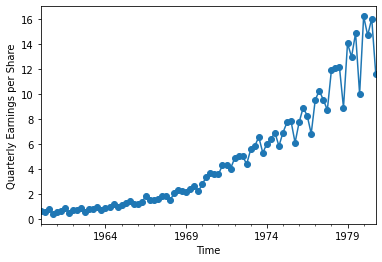

In [7]:
# Example 1.1
jj.plot(xlabel='Time', ylabel='Quarterly Earnings per Share', marker='o', 
        legend=False)
plt.show()

Jhonson and Johnson quarterly earnings per share, 84 quarters, 1960-I to 1980-IV.
Gradually increasing trend and regular variation on the trend repeat over time.

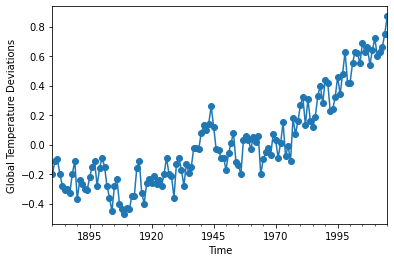

In [8]:
# Example 1.2
globtemp.plot(xlabel='Time', ylabel='Global Temperature Deviations', 
                marker='o', legend=False)
plt.show()

Yearly average global temparature deviations (1880-2015) in degree centigrade.

*   Upward trend in the latter part of the 20th century (global warming hypothesis).
*   Leveling off at about 1935 and then rather sharp upward trend at about 1970.

Is overall trend natural or whether it is caused by some human-induced interface?
Trend is more interest than periodicities.


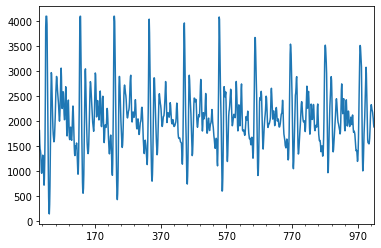

In [9]:
# Example 1.3
speech.plot(legend=False)
plt.show()

Speech recording of the syllable aaa..hhh sampled at 10000 points per second with $n=1020$ points.
Repetitive nature of the signal and the regular periodicities. 

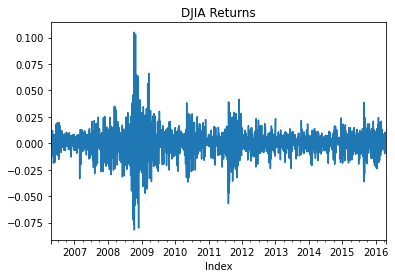

In [13]:
# Example 1.4
djiar = djia['Close'].apply(np.log).diff()
djiar.plot(title="DJIA Returns")
plt.show()

The daily returns of the Dow jones Industrial Average (DJIA) from April 20, 2006 to April 20, 2016. 


*   Financial crisis in 2008. 
*   Mean of the series appears to be stable (approximate average return is zero)
*   Highly volatile periods are clustered together.
How to forecast the volatility? ARCH and GARCH models and stochastics volatility models.

$r_t = (x_t-x_{t-1})/x_{t-1}\implies 1+r_t = x_t/x_{t-1}\implies log(1+r_t)=log(x_t/x_{t-1})=log(x_t)-log(x_{t-1})\approx r_t$.

$log(1+p)=p-\frac{p^2}{2}+\frac{p^3}{3}-.... $ for $-1\leq p \leq 1$.


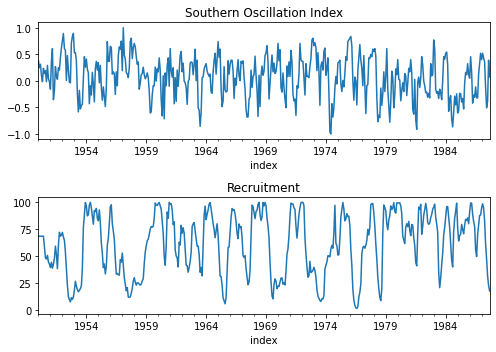

In [14]:
# Example 1.5
fig, axes = plt.subplots(nrows=2, figsize=(7, 5))
soi.plot(ax=axes[0], title="Southern Oscillation Index", legend=False)
rec.plot(ax=axes[1], title="Recruitment", legend=False)
fig.tight_layout()
plt.show()

Monthly values of of an environment series called Southern Osciallation Index (SOI) and associated Recruitment (number of new fish) furnished by Pacific Environment Fisheries Group. 


*   Repetitive behavior with regular repeating cycles, 

What is the rate/frequency of oscillation? 
Two types of visible oscillations: Annual cycle (Summer and Winter)and slower frequncy that repeats about every 4 years 

Also two series are related. Fish population depends on ocean temparture.



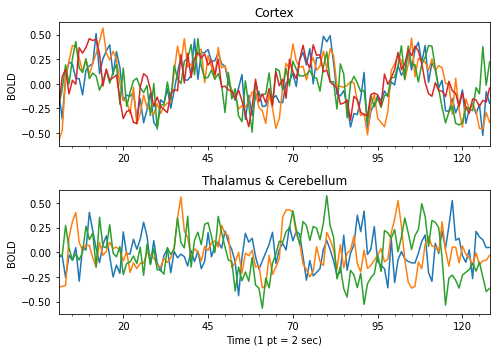

In [15]:
# Example 1.6
fig, axes = plt.subplots(nrows=2, figsize=(7, 5))
fmri1.iloc[:, 1:5].plot(ax=axes[0], ylabel="BOLD", xlabel="", title="Cortex",
                        legend=False)
fmri1.iloc[:, 5:10].plot(ax=axes[1], ylabel="BOLD", xlabel="Time (1 pt = 2 sec)",
                         title="Thalamus & Cerebellum", legend=False)
fig.tight_layout()
plt.show()

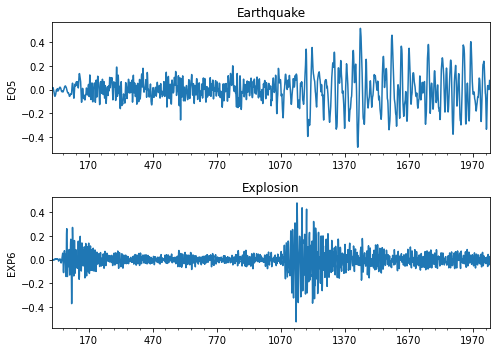

In [16]:
# Example 1.7
fig, axes = plt.subplots(nrows=2, figsize=(7, 5))
EQ5.plot(ax=axes[0], ylabel="EQ5", title="Earthquake", legend=False)
EXP6.plot(ax=axes[1], ylabel="EXP6", title="Explosion", legend=False)
fig.tight_layout()
plt.show()

## Example 1.8: White noise

Uncorrelated random variables, $w_t$ with mean 0 and finite variance $\sigma_w^2$. We take, $w_t \sim iid N(0,\sigma_w^2)$.
$w_t$ shows a mixture of many different kinds of oscillations. 
Slightly resemblance to the explosion, ex: 1.7

## Example 1.9 Moving average and Filtering
Ways to introduce serial correlation and smoothness.
Ex: $v_t = \frac{1}{3}(w_{t-1}+w_t+w_{t+1})$. Slower oscillations are more apparent and faster oscialltions are taken out. This is similar to to the SOI in example 1.5.

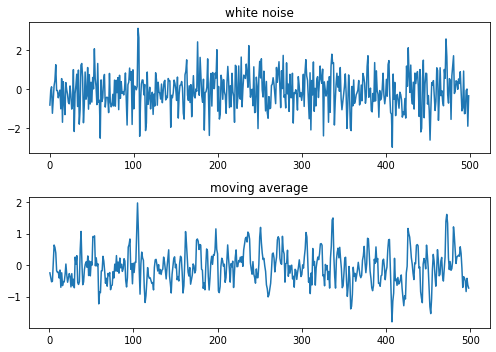

In [12]:
# Example 1.9
w = np.random.normal(loc=0, scale=1, size=500)
v = sm.tsa.filters.convolution_filter(w, filt=np.repeat(1/3, 3), nsides=2) # moving average

fig, axes = plt.subplots(nrows=2, figsize=(7, 5))
axes[0].plot(w)
axes[0].set_title("white noise")
axes[1].plot(v)
axes[1].set_title("moving average")
fig.tight_layout()
plt.show()

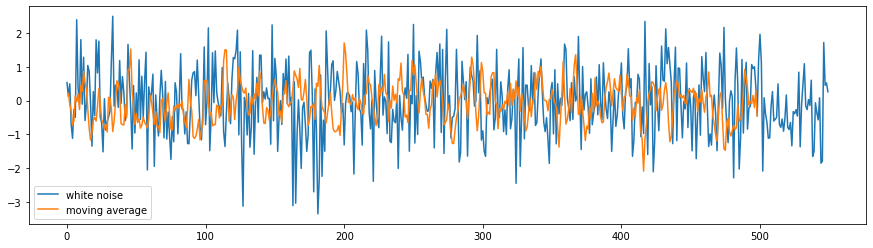

In [10]:
# now try this (not in text)
plt.figure(figsize=(15,4))
plt.plot(w, label="white noise")
plt.plot(v, label="moving average")
plt.legend()
plt.show()

## Example 1.10 Autoregressions
 $w_t \sim iid N(0,1)$

$x_t = x_{t-1}-0.9x_{t-2}+w_t$  $\;\;\;\;\;\;$ (1.2)

Periodic behavior of the series similar to the speech series. 

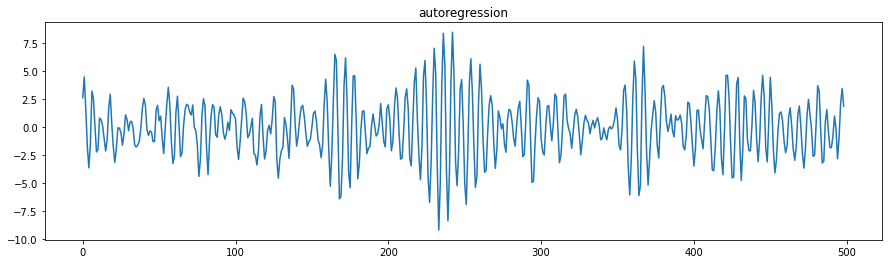

In [9]:
# Example 1.10
w = np.random.normal(loc=0, scale=1, size=550) # 50 extra to avoid startup problems
x = sm.tsa.filters.recursive_filter(w, ar_coeff=np.array([1, -.9]))[51:]

plt.figure(figsize=(15,4))
plt.plot(x)
plt.title("autoregression")
plt.show()

## Random Walk with Drift

$x_t=\delta + x_{t-1} + w_t$ $\;\;\;$ (1.3)

for $t=1,2,...$ where $w_t \sim iid N(0,1)$. 

$\delta$ is called the drift.

When $\delta=0$, (1.3) is called a random walk.

Note that (1.3) is also expressed as $x_t = \delta t +\sum_{j=1}^{t}w_j$. 

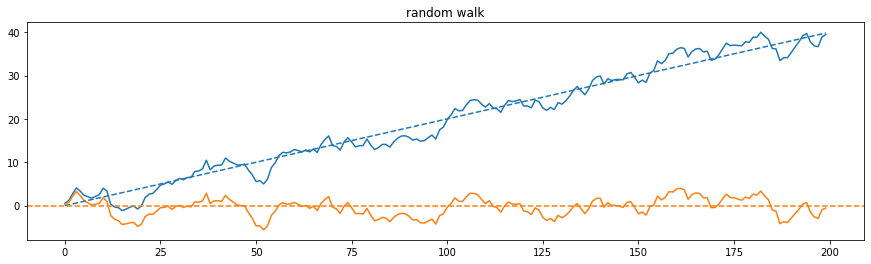

In [16]:
# Example 1.11
np.random.seed(444) # so you can reproduce the results
w = np.random.normal(size=200)
x = np.cumsum(w)
wd = w + .2
xd = np.cumsum(wd)

plt.figure(figsize=(15,4))
plt.plot(xd)
plt.plot(x)
x = np.arange(0, 200)
plt.plot(x, .2 * x, color="#1f77b4", linestyle="--")
plt.axhline(y=0, color="#ff7f0e", linestyle="--")
plt.title("random walk")
plt.show()

## Example 1.12 Signal and Noise
Series with an underlying signal with some consistent period variation, contaminated by adding a random noise.

We may detect the FMRI (ex 1.6) type series with a model:

$x_t=2\cos(2\pi \frac{t+15}{50})+w_t$ for $t=1,2,...,500$.

Note that the sinusoidal waveform can be written as $A\cos(2\pi\omega t + \phi)$; $A-$ amplitude, $\omega-$frequency, $\phi-$ phase shift.

Figure below shows that adding two together obscures the signal. Degree of obscure = $\sigma_w$.

Signal_to_noise ratio = $\frac{A}{\sigma_w}$.

Spectral analysis is a technique that can be used to detect this type of signals.

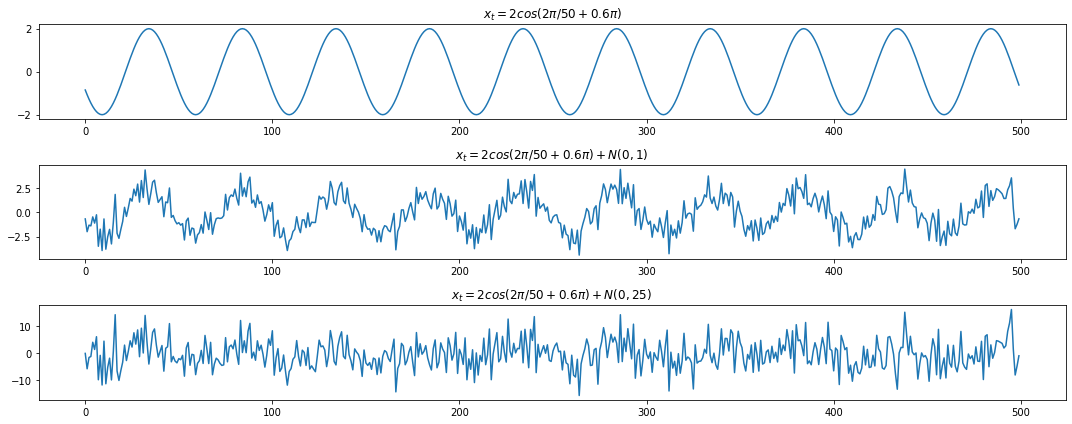

In [19]:
# Example 1.12
cs = 2 * np.cos(2 * np.pi * np.arange(1, 501) / 50 + .6 * np.pi)
w = np.random.normal(size=500)

fig, axes = plt.subplots(nrows=3, figsize=(15, 6))
axes[0].plot(cs)
axes[0].set_title(r"$x_{t} = 2cos(2\pi / 50 + 0.6\pi)$")
axes[1].plot(cs + w)
axes[1].set_title(r"$x_{t} = 2cos(2\pi / 50 + 0.6\pi) + N(0, 1)$")
axes[2].plot(cs + 5 * w)
axes[2].set_title(r"$x_{t} = 2cos(2\pi / 50 + 0.6\pi) + N(0, 25)$")
fig.tight_layout()
plt.show()